In [1]:
using DelimitedFiles, FileIO
using Plots, Rsvg, LaTeXStrings
using Chemfiles, JUMD, NamedArrays
using LinearAlgebra, Statistics
pdb = "1f96"
casa_ca = string("/home/pbarletta/labo/20/bisana/run/carmn_1f96")
casa_6 = string("/home/pbarletta/labo/20/bisana/run/rmn_1f96")
rtdos = "/home/pbarletta/labo/20/bisana/rtdos_log"

"/home/pbarletta/labo/20/bisana/rtdos_log"

## Volúmenes de cavidades 1F96

In [2]:
n_rmn = 20
vol_ecf = Array{Float64, 1}(undef, n_rmn)
vol_edf = Array{Float64, 1}(undef, n_rmn)

for i in 1:n_rmn
    vol_ecf[i] = convert(Float64, readdlm(joinpath(
        casa_ca, "cavidad", string("vol_ecf_", i)))[1, 2])
    vol_edf[i] = convert(Float64, readdlm(joinpath(
        casa_ca, "cavidad", string("vol_edf_", i)))[1, 2])
end

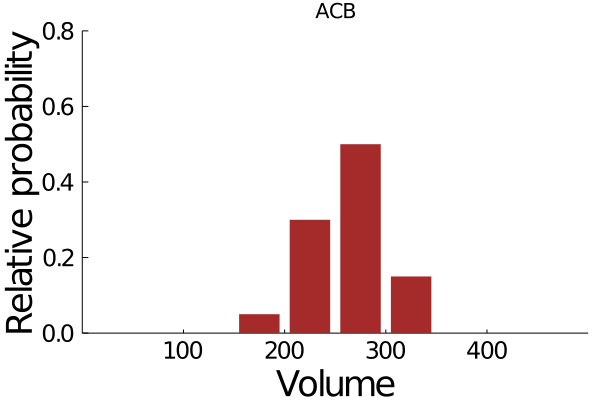

In [3]:
st = 50
min_vol = 100
max_vol = 500
bin_vol = collect(min_vol:st:max_vol)
wgh_vol = fill(1.0, length(vol_ecf))

# Histograma ponderado
Wbins_vol_acb, Whis_vol_acb = JUMD.weightedHist(vol_ecf, bin_vol, wgh_vol, true, false);

plt_his_vol = bar(Wbins_vol_acb, Whis_vol_acb,
    xlims = (0, max_vol), ylims = (0, .8),
    xticks = 100:100:max_vol-50,
    linecolor = false, fillcolor = Colors.colorant"Brown",
    grid = false, legend = false,
    guidefont = font(24, "Arial"), tickfont = font(16, "Arial"),
    legendfont = font(16, "Arial"),
    title = "ACB", yaxis = "Relative probability", xaxis = "Volume")

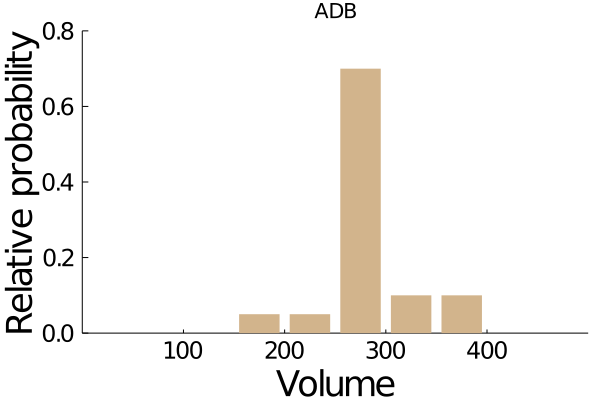

In [4]:
# Histograma ponderado
Wbins_vol_adb, Whis_vol_adb = JUMD.weightedHist(vol_edf, bin_vol, wgh_vol, true, false);

plt_his_vol = bar(Wbins_vol_adb, Whis_vol_adb,
    xlims = (0, max_vol), ylims = (0, .8),
    xticks = 100:100:max_vol-50,
    linecolor = false, fillcolor = Colors.colorant"Tan",
    grid = false, legend = false,
    guidefont = font(24, "Arial"), tickfont = font(16, "Arial"),
    legendfont = font(16, "Arial"),
    title = "ADB", yaxis = "Relative probability", xaxis = "Volume")

In [5]:
NamedArray([ mean(vol_ecf) std(vol_ecf) std(vol_ecf) / mean(vol_ecf) ; 
     mean(vol_edf) std(vol_edf) std(vol_edf) / mean(vol_ecf) ],
    (["ACB" ; "ADB"], ["μ" ; "std" ; "μ/std"]))

2×3 Named Array{Float64,2}
A ╲ B │        μ       std     μ/std
──────┼─────────────────────────────
ACB   │  263.428   38.5132    0.1462
ADB   │  282.687   43.0301  0.163347

## Flexibilidad con modos de 6 partículas

In [6]:
for coff in 7:12
    global flx_ecf = Array{Float64, 1}(undef, n_rmn)
    global flx_edf = Array{Float64, 1}(undef, n_rmn)

    for i in 1:n_rmn
        flx_ecf[i] = convert(Float64, readdlm(joinpath(
            casa_6, string(coff, "_cutoff_1f96"), "flx", string(i, "_flx_ecf_5")))[1, 2])
        flx_edf[i] = convert(Float64, readdlm(joinpath(
            casa_6, string(coff, "_cutoff_1f96"), "flx", string(i, "_flx_edf_5")))[1, 2])
    end
    
    sym_flx_ecf = Symbol("flx_ecf_", coff)
    sym_flx_edf = Symbol("flx_edf_", coff)
    eval(:($sym_flx_ecf = flx_ecf))
    eval(:($sym_flx_edf = flx_edf))
end

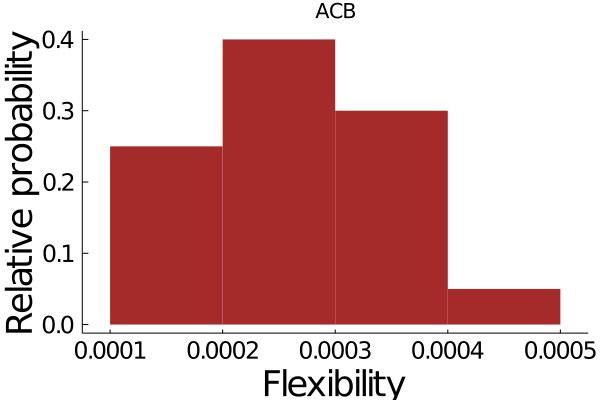

In [7]:
plt_his_flx = histogram(flx_ecf_7, norm = :probability,
    linecolor = false, fillcolor = Colors.colorant"Brown",
    grid = false, legend = false,
    guidefont = font(24, "Arial"), tickfont = font(16, "Arial"),
    legendfont = font(16, "Arial"),
    title = "ACB", yaxis = "Relative probability", xaxis = "Flexibility")

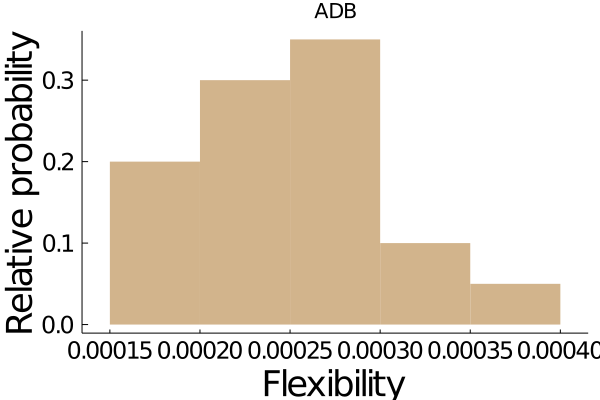

In [8]:
plt_his_flx = histogram(flx_edf_7, norm = :probability,
    linecolor = false, fillcolor = Colors.colorant"Tan",
    grid = false, legend = false,
    guidefont = font(24, "Arial"), tickfont = font(16, "Arial"),
    legendfont = font(16, "Arial"),
    title = "ADB", yaxis = "Relative probability", xaxis = "Flexibility")

## Flexibilidad con modos de Calpha

In [9]:
for coff in 7:20
    global flx_ecf_ca = Array{Float64, 1}(undef, n_rmn)
    global flx_edf_ca = Array{Float64, 1}(undef, n_rmn)

    for i in 1:n_rmn
        flx_ecf_ca[i] = convert(Float64, readdlm(joinpath(
            casa_ca, string(coff, "_cutoff_1f96"), "flx", string(i, "_flx_ecf_5")))[1, 2])
        flx_edf_ca[i] = convert(Float64, readdlm(joinpath(
            casa_ca, string(coff, "_cutoff_1f96"), "flx", string(i, "_flx_edf_5")))[1, 2])
    end
    
    sym_flx_ecf_ca = Symbol("flx_ecf_ca_", coff)
    sym_flx_edf_ca = Symbol("flx_edf_ca_", coff)
    eval(:($sym_flx_ecf_ca = flx_ecf_ca))
    eval(:($sym_flx_edf_ca = flx_edf_ca))
end

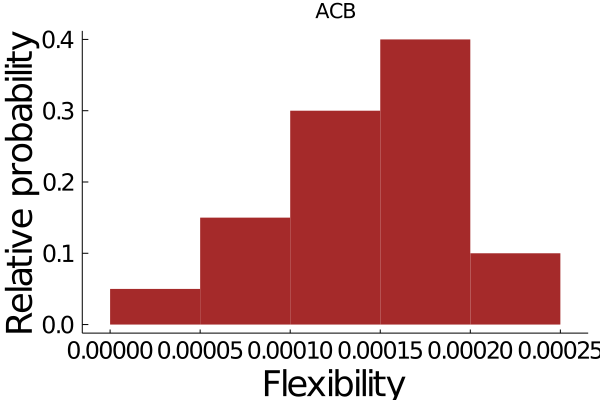

In [10]:
plt_his_flx = histogram(flx_ecf_ca_7, norm = :probability,
    linecolor = false, fillcolor = Colors.colorant"Brown",
    grid = false, legend = false,
    guidefont = font(24, "Arial"), tickfont = font(16, "Arial"),
    legendfont = font(16, "Arial"),
    title = "ACB", yaxis = "Relative probability", xaxis = "Flexibility")

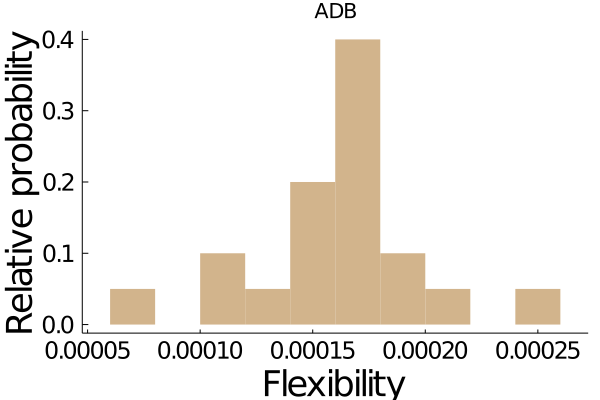

In [11]:
plt_his_flx = histogram(flx_edf_ca_7, norm = :probability,
    linecolor = false, fillcolor = Colors.colorant"Tan",
    grid = false, legend = false,
    guidefont = font(24, "Arial"), tickfont = font(16, "Arial"),
    legendfont = font(16, "Arial"),
    title = "ADB", yaxis = "Relative probability", xaxis = "Flexibility")

# INICIO de celdas exclusivas

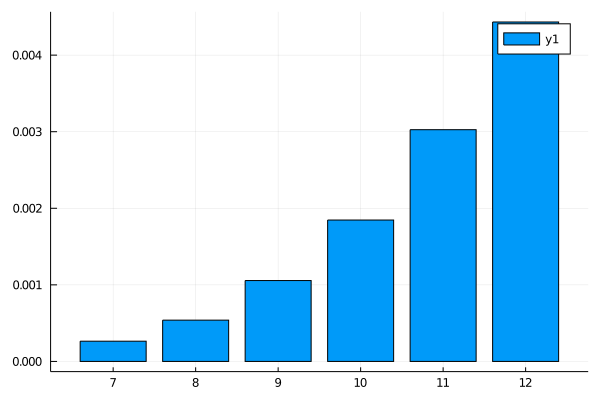

In [12]:
tempo = [ mean(flx_ecf_7) ; mean(flx_ecf_8) ; mean(flx_ecf_9) ;
    mean(flx_ecf_10) ; mean(flx_ecf_11) ; mean(flx_ecf_12) ]

xs = [string(i) for i = 7:12]

bar(xs, tempo)

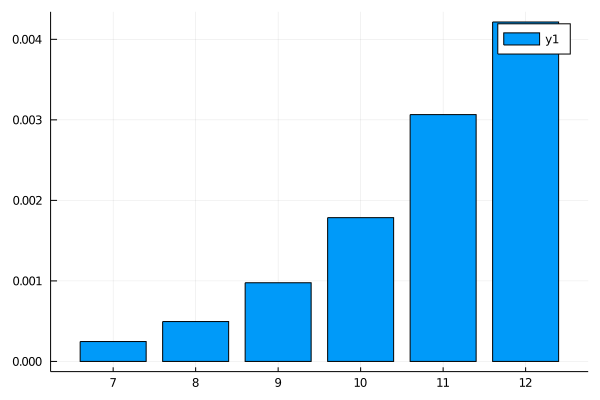

In [13]:
tempo = [ mean(flx_edf_7) ; mean(flx_edf_8) ; mean(flx_edf_9) ;
    mean(flx_edf_10) ; mean(flx_edf_11) ; mean(flx_edf_12) ]

xs = [string(i) for i = 7:12]

bar(xs, tempo)

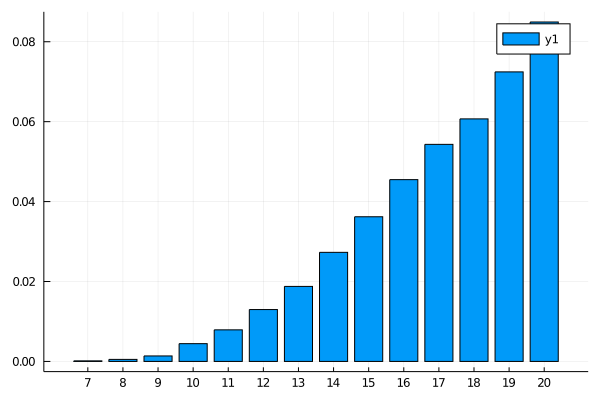

In [14]:
tempo = [ mean(flx_ecf_ca_7) ; mean(flx_ecf_ca_8) ; mean(flx_ecf_ca_9) ;
    mean(flx_ecf_ca_10) ; mean(flx_ecf_ca_11) ; mean(flx_ecf_ca_12) ;
    mean(flx_ecf_ca_13) ; mean(flx_ecf_ca_14) ; mean(flx_ecf_ca_15) ;
    mean(flx_ecf_ca_16) ; mean(flx_ecf_ca_17) ; mean(flx_ecf_ca_18) ;
    mean(flx_ecf_ca_19) ; mean(flx_ecf_ca_20) ]

xs = [string(i) for i = 7:20]

bar(xs, tempo)

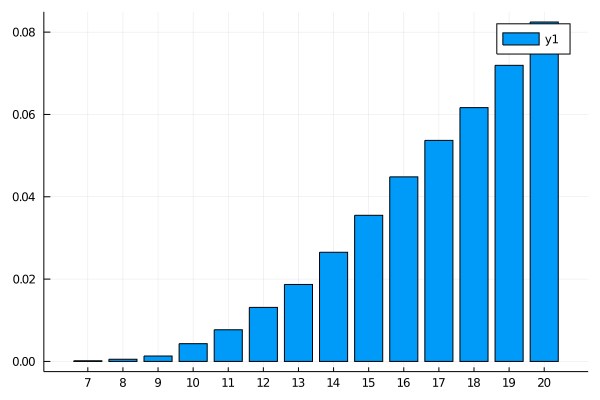

In [15]:
tempo = [ mean(flx_edf_ca_7) ; mean(flx_edf_ca_8) ; mean(flx_edf_ca_9) ;
    mean(flx_edf_ca_10) ; mean(flx_edf_ca_11) ; mean(flx_edf_ca_12) ;
    mean(flx_edf_ca_13) ; mean(flx_edf_ca_14) ; mean(flx_edf_ca_15) ;
    mean(flx_edf_ca_16) ; mean(flx_edf_ca_17) ; mean(flx_edf_ca_18) ;
    mean(flx_edf_ca_19) ; mean(flx_edf_ca_20) ]

xs = [string(i) for i = 7:20]

bar(xs, tempo)

# FIN de celdas exclusivas